# ID5059 2022-23: Coursework Assignment 1

## Acknowledgments

This assignment is loosely based on the first assignment set by [Tom Kelsey](https://www.st-andrews.ac.uk/computer-science/people/twk/) in the 2020-21 delivery of ID5059. It uses data from the [Flight status prediction dataset](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022) on [Kaggle](https://www.kaggle.com), posted by [Rob Mulla](https://www.linkedin.com/in/rob-mulla/).

### Get the data

This notebook is just intended to get you started: it includes enough to load one of the small datasets.

In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn us | grep -v 'already satisfied'

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import us

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ejml1/.local/lib/python3.9/site-packages
sysconfig: /home/ejml1/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


/tmp/ipykernel_177175/4153704885.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


Various parts of the dataset are [available on the CS teaching servers](https://wiki.cs.st-andrews.ac.uk/index.php?title=Teaching_Service) at the [following path](/cs/datasets/ID5059/Coursework1/). For the [small](/cs/datasets/ID5059/Coursework1/1_small) and [medium](/cs/datasets/ID5059/Coursework1/2_medium) files there's no harm in downloading them to your laptop or to your filespace in the lab, if that's convenient.

For the [large](/cs/datasets/ID5059/Coursework1/3_large) and [huge](/cs/datasets/ID5059/Coursework1/4_huge) files, you **must not download them to your filespace on the School servers**. If everyone does this it will take up too much disk space. This applies whether you are using a machine in the lab, or connecting to a School server from your laptop.

Instead, you must access such files directly from studres, e.g. at:

```/cs/datasets/ID5059/Coursework1/3_large/Combined_Flights_large_train_2022.csv```

If you want to download large files to the disk on your own laptop, that's up to you!

In [2]:
# Read the dataset from a file on studres.
flights = pandas.read_csv("/cs/datasets/ID5059/Coursework1/1_small/Combined_Flights_small.csv")

# Clear the maximum number of columns to be displayed, so that all will be visible.
pandas.set_option('display.max_columns', None)

display(flights)

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrDel15,ArrTimeBlk,DistanceGroup,Disruption
0,1,2018-09-07,SkyWest Airlines Inc.,SLC,LAX,0,0,1953,119,590,2018,3,9,7,5,UA,UA_CODESHARE,19977,UA,5563,OO,20304,OO,N208SY,5563,14869,1486903,34614,"Salt Lake City, UT",UT,49,Utah,87,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,1900-1959,2052,0.0,2000-2059,3,0
1,2,2018-06-27,Air Wisconsin Airlines Corp,ORD,ILM,0,0,1355,136,760,2018,2,6,27,3,UA,UA_CODESHARE,19977,UA,4835,ZW,20046,ZW,N467AW,4835,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,12323,1232305,32323,"Wilmington, NC",NC,37,North Carolina,36,1300-1359,1711,1.0,1700-1759,4,1
2,3,2018-03-14,Southwest Airlines Co.,MCO,SJU,0,0,1705,160,1189,2018,1,3,14,3,WN,WN,19393,WN,1544,WN,19393,WN,N7822A,1544,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,14843,1484306,34819,"San Juan, PR",PR,72,Puerto Rico,3,1700-1759,1945,0.0,1900-1959,5,0
3,4,2018-02-18,JetBlue Airways,JFK,LAX,0,0,1046,384,2475,2018,1,2,18,7,B6,B6,20409,B6,423,B6,20409,B6,N967JB,423,12478,1247805,31703,"New York, NY",NY,36,New York,22,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,1000-1059,1410,0.0,1400-1459,10,0
4,5,2018-10-26,Endeavor Air Inc.,ROC,JFK,0,0,1850,98,264,2018,4,10,26,5,DL,DL_CODESHARE,19790,DL,5510,9E,20363,9E,N293PQ,5510,14576,1457606,34576,"Rochester, NY",NY,36,New York,22,12478,1247805,31703,"New York, NY",NY,36,New York,22,1800-1859,2028,0.0,2000-2059,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,29187,2022-06-21,Capital Cargo International,PHL,SYR,0,0,1358,76,228,2022,2,6,21,2,AA,AA_CODESHARE,19805,AA,6132,PT,20427,PT,N644AE,6132,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,15096,1509602,35096,"Syracuse, NY",NY,36,New York,22,1300-1359,1514,0.0,1500-1559,1,0
29187,29188,2022-07-20,Southwest Airlines Co.,SMF,LGB,0,0,1715,80,387,2022,3,7,20,3,WN,WN,19393,WN,469,WN,19393,WN,N7737E,469,14893,1489302,33192,"Sacramento, CA",CA,6,California,91,12954,1295407,32575,"Long Beach, CA",CA,6,California,91,1700-1759,1835,0.0,1800-1859,2,0
29188,29189,2022-07-27,SkyWest Airlines Inc.,LRD,DFW,0,0,1821,86,396,2022,3,7,27,3,AA,AA_CODESHARE,19805,AA,3171,OO,20304,OO,N656CA,3171,13061,1306106,33038,"Laredo, TX",TX,48,Texas,74,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,1800-1859,1947,0.0,1900-1959,2,0
29189,29190,2022-07-31,American Airlines Inc.,PVD,CLT,0,0,1946,129,683,2022,3,7,31,7,AA,AA,19805,AA,1877,AA,19805,AA,N881NN,1877,14307,1430705,30721,"Providence, RI",RI,44,Rhode Island,15,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,1900-1959,2155,1.0,2100-2159,3,1


Remove the disallowed columns as specified from the specification file

In [3]:
disallowed_columns = ["DepTime", "DepDelayMinutes", "DepDelay", "ArrTime", "ArrDelayMinutes", "AirTime", "ActualElapsedTime",
                      "DepDel15", "DepartureDelayGroups", "TaxiOut", "WheelsOff", "WheelsOn", "TaxiIn", "ArrDelay", 
                      "ArrivalDelayGroups", "DivAirportLandings", "Cancelled", "Diverted", "ArrDel15"]


flights = flights.drop(columns=flights.columns.intersection(disallowed_columns))

<h2>Explore Dataset</h2>

In [4]:
flights

,Unnamed: 0,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,1,2018-09-07,SkyWest Airlines Inc.,SLC,LAX,1953,119,590,2018,3,9,7,5,UA,UA_CODESHARE,19977,UA,5563,OO,20304,OO,N208SY,5563,14869,1486903,34614,"Salt Lake City, UT",UT,49,Utah,87,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,1900-1959,2052,2000-2059,3,0
1,2,2018-06-27,Air Wisconsin Airlines Corp,ORD,ILM,1355,136,760,2018,2,6,27,3,UA,UA_CODESHARE,19977,UA,4835,ZW,20046,ZW,N467AW,4835,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,12323,1232305,32323,"Wilmington, NC",NC,37,North Carolina,36,1300-1359,1711,1700-1759,4,1
2,3,2018-03-14,Southwest Airlines Co.,MCO,SJU,1705,160,1189,2018,1,3,14,3,WN,WN,19393,WN,1544,WN,19393,WN,N7822A,1544,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,14843,1484306,34819,"San Juan, PR",PR,72,Puerto Rico,3,1700-1759,1945,1900-1959,5,0
3,4,2018-02-18,JetBlue Airways,JFK,LAX,1046,384,2475,2018,1,2,18,7,B6,B6,20409,B6,423,B6,20409,B6,N967JB,423,12478,1247805,31703,"New York, NY",NY,36,New York,22,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,1000-1059,1410,1400-1459,10,0
4,5,2018-10-26,Endeavor Air Inc.,ROC,JFK,1850,98,264,2018,4,10,26,5,DL,DL_CODESHARE,19790,DL,5510,9E,20363,9E,N293PQ,5510,14576,1457606,34576,"Rochester, NY",NY,36,New York,22,12478,1247805,31703,"New York, NY",NY,36,New York,22,1800-1859,2028,2000-2059,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,29187,2022-06-21,Capital Cargo International,PHL,SYR,1358,76,228,2022,2,6,21,2,AA,AA_CODESHARE,19805,AA,6132,PT,20427,PT,N644AE,6132,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,15096,1509602,35096,"Syracuse, NY",NY,36,New York,22,1300-1359,1514,1500-1559,1,0
29187,29188,2022-07-20,Southwest Airlines Co.,SMF,LGB,1715,80,387,2022,3,7,20,3,WN,WN,19393,WN,469,WN,19393,WN,N7737E,469,14893,1489302,33192,"Sacramento, CA",CA,6,California,91,12954,1295407,32575,"Long Beach, CA",CA,6,California,91,1700-1759,1835,1800-1859,2,0
29188,29189,2022-07-27,SkyWest Airlines Inc.,LRD,DFW,1821,86,396,2022,3,7,27,3,AA,AA_CODESHARE,19805,AA,3171,OO,20304,OO,N656CA,3171,13061,1306106,33038,"Laredo, TX",TX,48,Texas,74,11298,1129806,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74,1800-1859,1947,1900-1959,2,0
29189,29190,2022-07-31,American Airlines Inc.,PVD,CLT,1946,129,683,2022,3,7,31,7,AA,AA,19805,AA,1877,AA,19805,AA,N881NN,1877,14307,1430705,30721,"Providence, RI",RI,44,Rhode Island,15,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,1900-1959,2155,2100-2159,3,1


In [5]:
flights.dtypes

Unnamed: 0                                  int64
FlightDate                                 object
Airline                                    object
Origin                                     object
Dest                                       object
CRSDepTime                                  int64
CRSElapsedTime                              int64
Distance                                    int64
Year                                        int64
Quarter                                     int64
Month                                       int64
DayofMonth                                  int64
DayOfWeek                                   int64
Marketing_Airline_Network                  object
Operated_or_Branded_Code_Share_Partners    object
DOT_ID_Marketing_Airline                    int64
IATA_Code_Marketing_Airline                object
Flight_Number_Marketing_Airline             int64
Operating_Airline                          object
DOT_ID_Operating_Airline                    int64


Ensure that the Distribution attribute only has 2 values. If so, convert it into a boolean type

In [6]:
print("Disruption: ", len(flights["Disruption"].unique()))

Disruption:  2


In [7]:
# Convert the Disruption column to boolean.
flights["Disruption"] = flights["Disruption"].astype(int).astype(bool)


In [8]:
# Get disruption column type
flights["Disruption"].dtype

dtype('bool')

(array([0, 1]), [Text(0, 0, 'Not Disrupted'), Text(1, 0, 'Disrupted')])

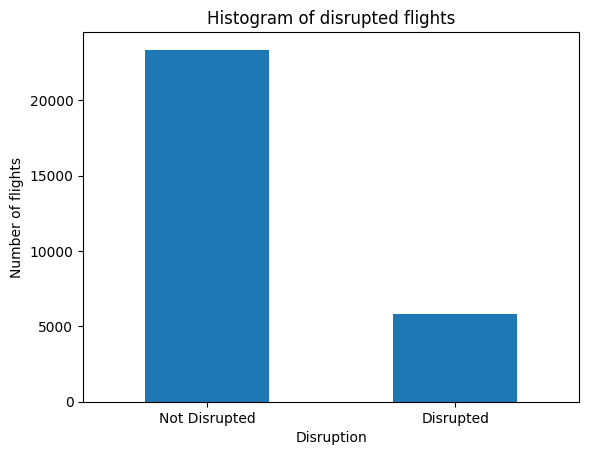

In [9]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights")
flights["Disruption"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Not Disrupted", "Disrupted"])
plt.xticks(rotation=0)


The attributes that I have selected to explore are:
1. Year
2. Month
3. DayOfWeek
4. DepTimeBlk
5. ArrTimeBlk
6. Operating_Airline
7. Distance
8. OriginAirportID
9. DestAirportID
10. OriginState

<h2>The effect of Covid-19 on flight disruption</h2>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

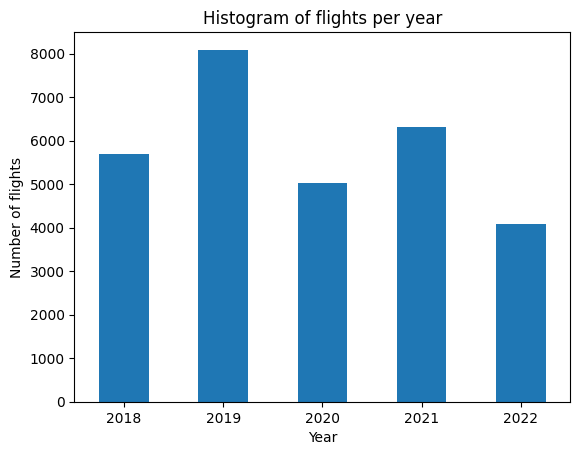

In [10]:
# Plot histogram of the number of flights per year
plt.ylabel("Number of flights")
plt.title("Histogram of flights per year")
flights["Year"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

In [11]:
print(f'Months present in 2022: {sorted(flights[flights["Year"] == 2022]["Month"].unique())}')

Months present in 2022: [1, 2, 3, 4, 5, 6, 7]


In [12]:
print(f'Months present in 2018: {sorted(flights[flights["Year"] == 2022]["Month"].unique())}')

Months present in 2018: [1, 2, 3, 4, 5, 6, 7]


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

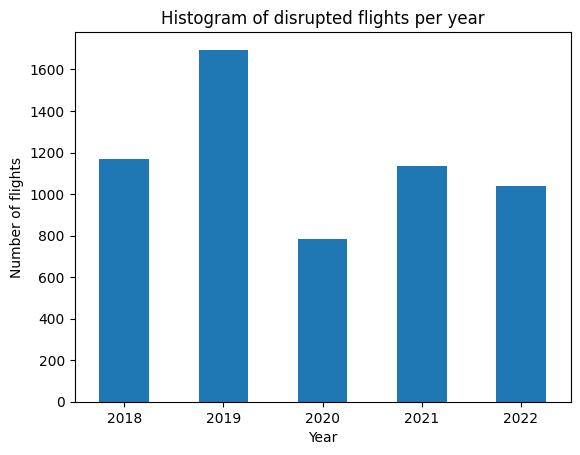

In [13]:
# plot number of disrupted flights per year
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per year")
flights[flights["Disruption"] == 1]["Year"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

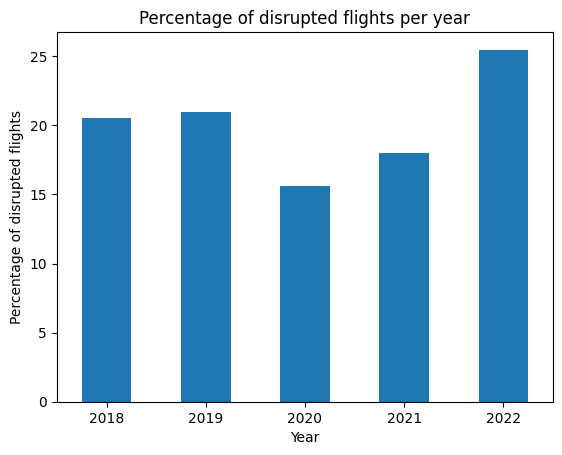

In [14]:
# Plot the percentage of disrupted flights per year
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per year")
(flights[flights["Disruption"] == 1]["Year"].value_counts().sort_index() / flights["Year"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=0)

COVID observations:

- COVID appears to have decreased the number of flights in 2020 and 2021 in comparison to 2019
- Potentially due to the decrease in flights, the percentage of distrupted flights during this time is lower

Post COVID observations:
- The dataset ends on August 2022 so the number of flights has decreased in total but is at a similar level to covid years
- As regulations open back up, the percentage of distrupted flights in 2022 is high

Pre COVID observations:
- Despite having all the months present in the dataset for the year 2018, I am not sure the reasoning behind why there were a lot fewer flights in this year compared to 2019


<h2>Explore the effect of Month on Disruption</h2>

- A quarter within a year may not capture the affect certain months have on distruption, thus choosing month may capture the granularity better

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

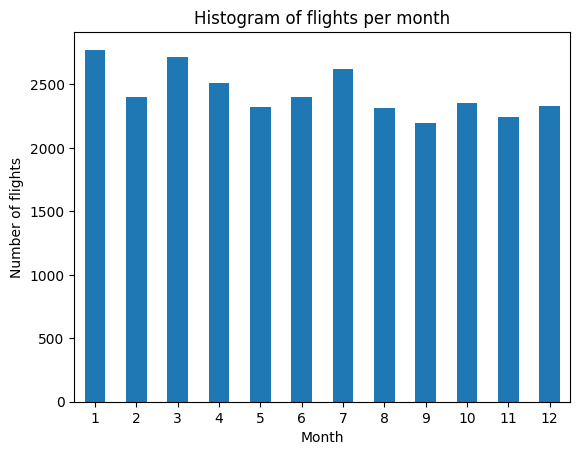

In [15]:
# Plot histogram of flights per month
plt.ylabel("Number of flights")
plt.title("Histogram of flights per month")
flights["Month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

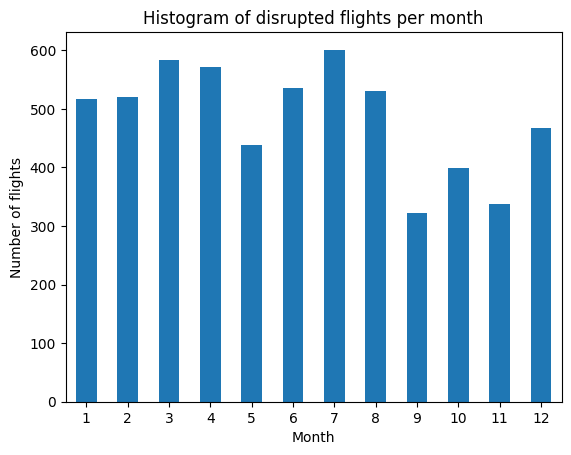

In [16]:
# Plot the number of disrupted flights per month
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per month")
flights[flights["Disruption"] == 1]["Month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

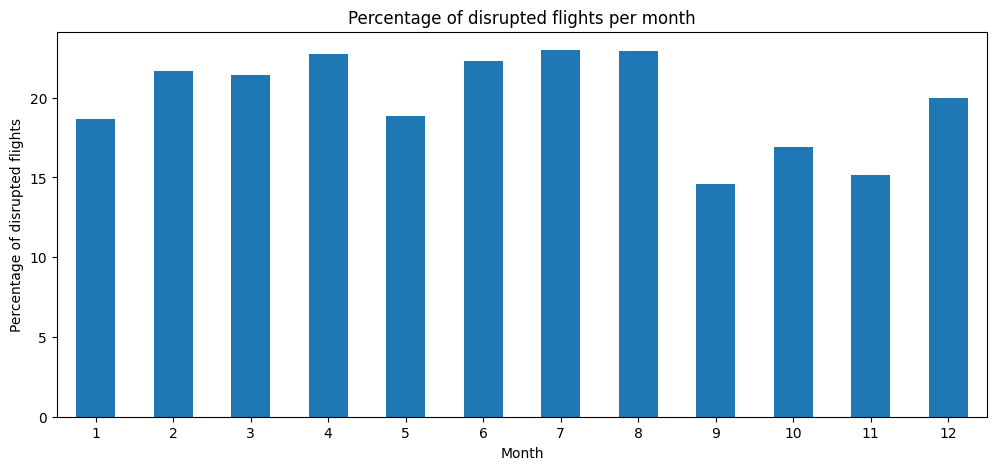

In [75]:
# Plot the percentage of disrupted flights per month
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per month")
(flights[flights["Disruption"] == 1]["Month"].value_counts().sort_index() / flights["Month"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

Month Observations:
- In general flights appear to be evenly distributed across all the months
- The months of September, October, and November have a visual difference in the proportion of flights that are not cancelled

<h2> Explore effect of day of week on disruption <h2>

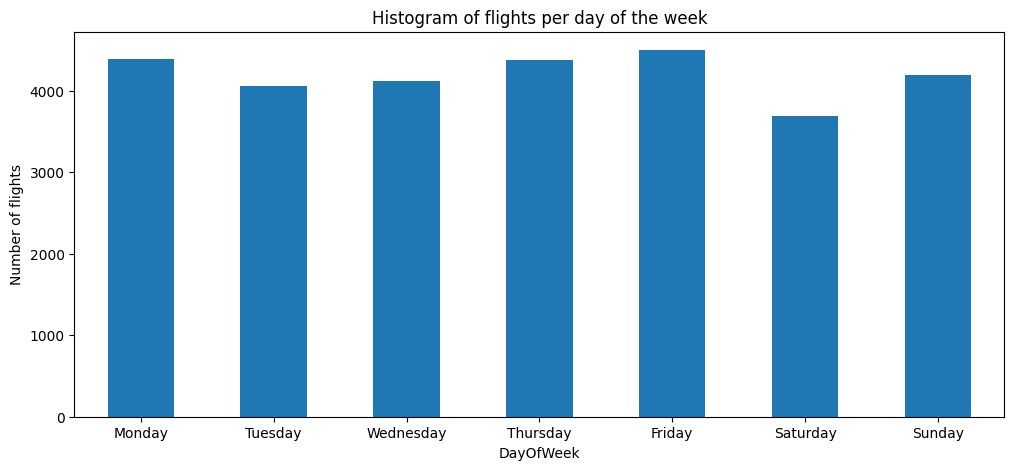

In [76]:
# Plot the number of disrupted flights per day of the week
plt.ylabel("Number of flights")
plt.title("Histogram of flights per day of the week")
flights["DayOfWeek"].value_counts().sort_index().plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

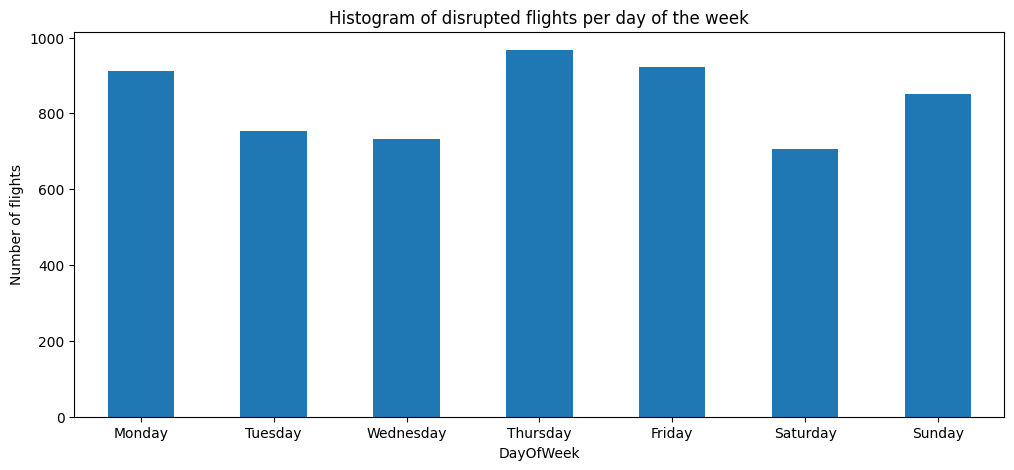

In [77]:
# Plot the number of disrupted flights per day of the week
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per day of the week")
flights[flights["Disruption"] == 1]["DayOfWeek"].value_counts().sort_index().plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

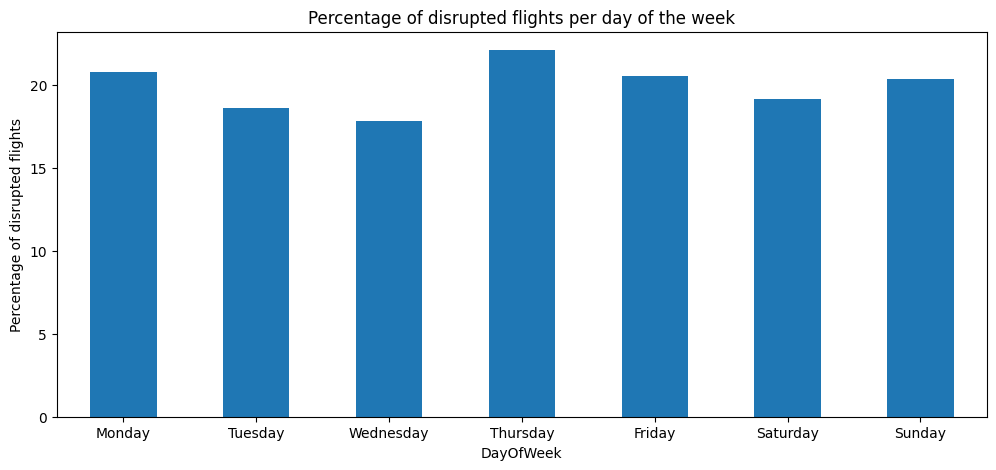

In [78]:
# Plot the percentage of disrupted flights per day of the week
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per day of the week")
(flights[flights["Disruption"] == 1]["DayOfWeek"].value_counts().sort_index() / flights["DayOfWeek"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

- Observations on day of the week:
    - There does not appear to be any significant correlation between the day of the week a flight takes off and the percentage of disruption

<h2>Explore the effect of departure block on disruption</h2>

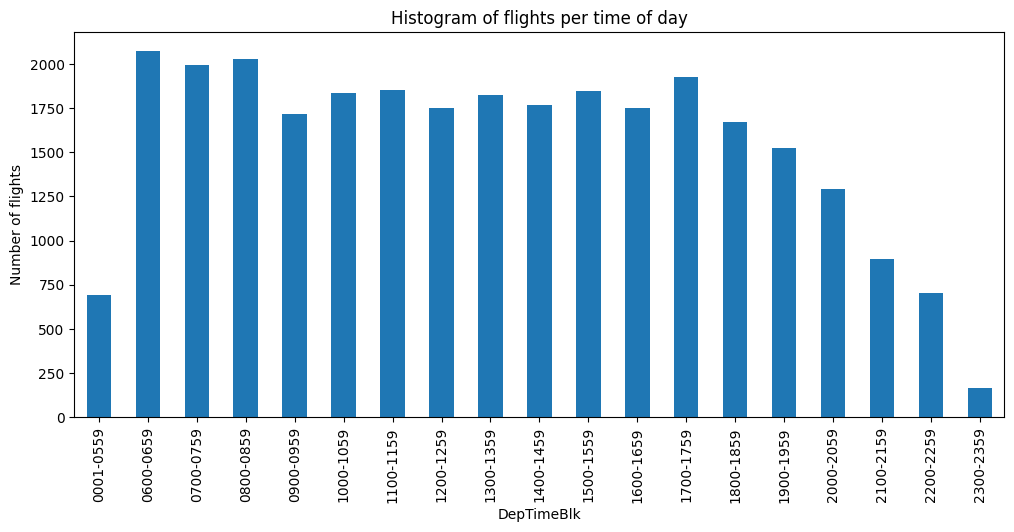

In [79]:
# Plot histogram of flights per time of day
plt.ylabel("Number of flights")
plt.title("Histogram of flights per time of day")
flights["DepTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

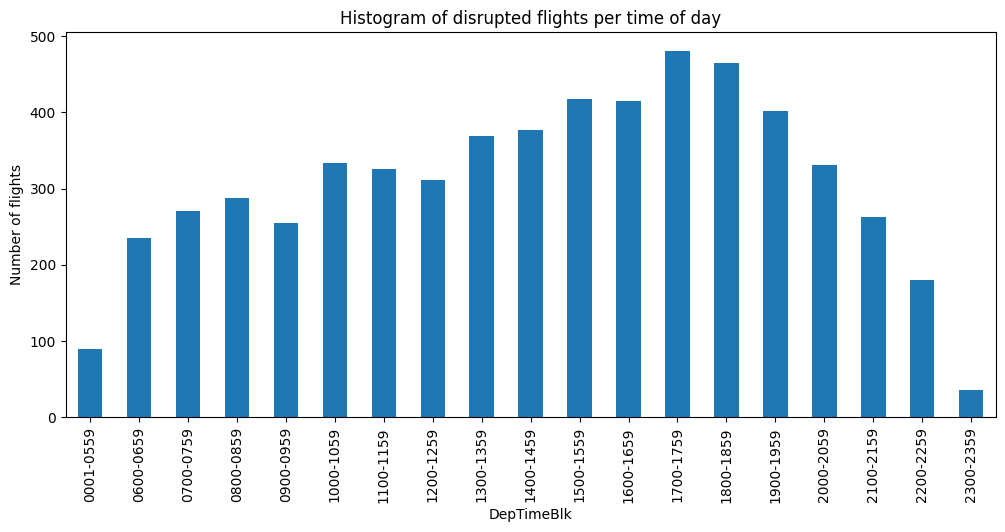

In [80]:
# Plot histogram of disrupted flights per time of day
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per time of day")
flights[flights["Disruption"] == 1]["DepTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

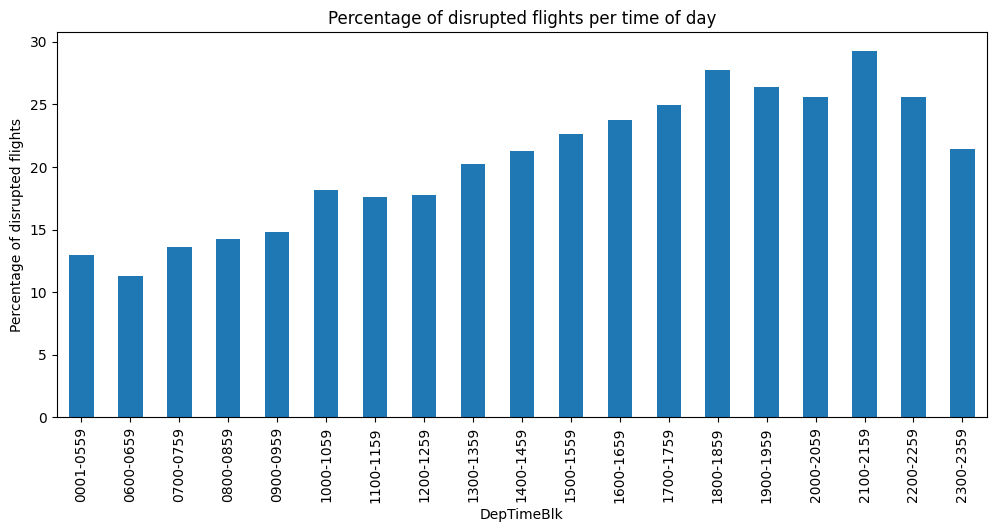

In [81]:
# Plot histogram of percentage disrupted flights per time of day
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per time of day")
(flights[flights["Disruption"] == 1]["DepTimeBlk"].value_counts().sort_index() / 
    flights["DepTimeBlk"].value_counts().sort_index() * 100).plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

- Observations on time of day:
    - There are less flights the later there are during the day
        - This could contribute to the observed linear trend: The later in the day the time is, the higher chance of disruption

<h2>Explore the effect of expected arrival time block on disruption</h2>

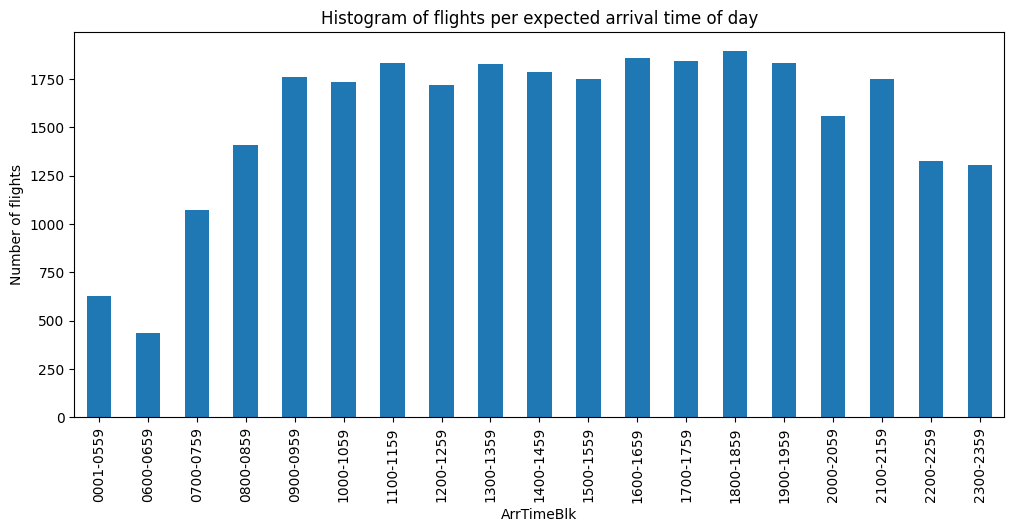

In [82]:
plt.ylabel("Number of flights")
plt.title("Histogram of flights per expected arrival time of day")
flights["ArrTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

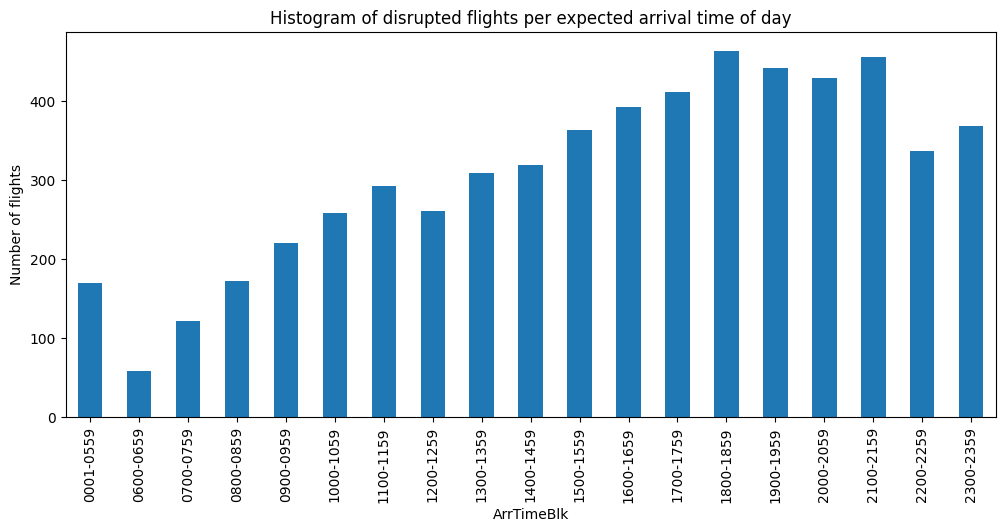

In [83]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per expected arrival time of day")
flights[flights["Disruption"] == 1]["ArrTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

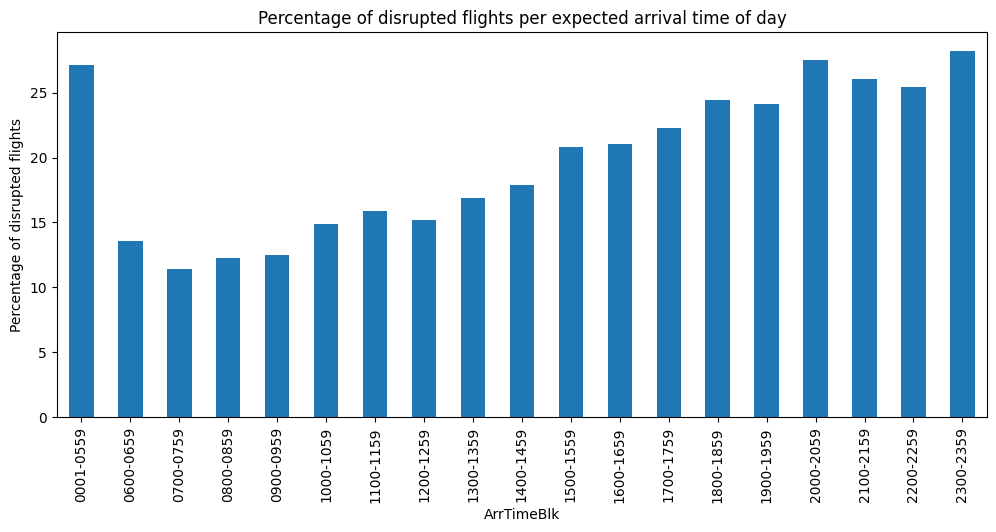

In [84]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per expected arrival time of day")
(flights[flights["Disruption"] == 1]["ArrTimeBlk"].value_counts().sort_index() 
    / flights["ArrTimeBlk"].value_counts().sort_index() * 100).plot(kind="bar")
plt.gcf().set_size_inches(12, 5)


- Observations on expected arrival time block of day on disruptions:
    - There are less flights expected to land earlier during the day
    - Follows a similar trend to the departure time block of day

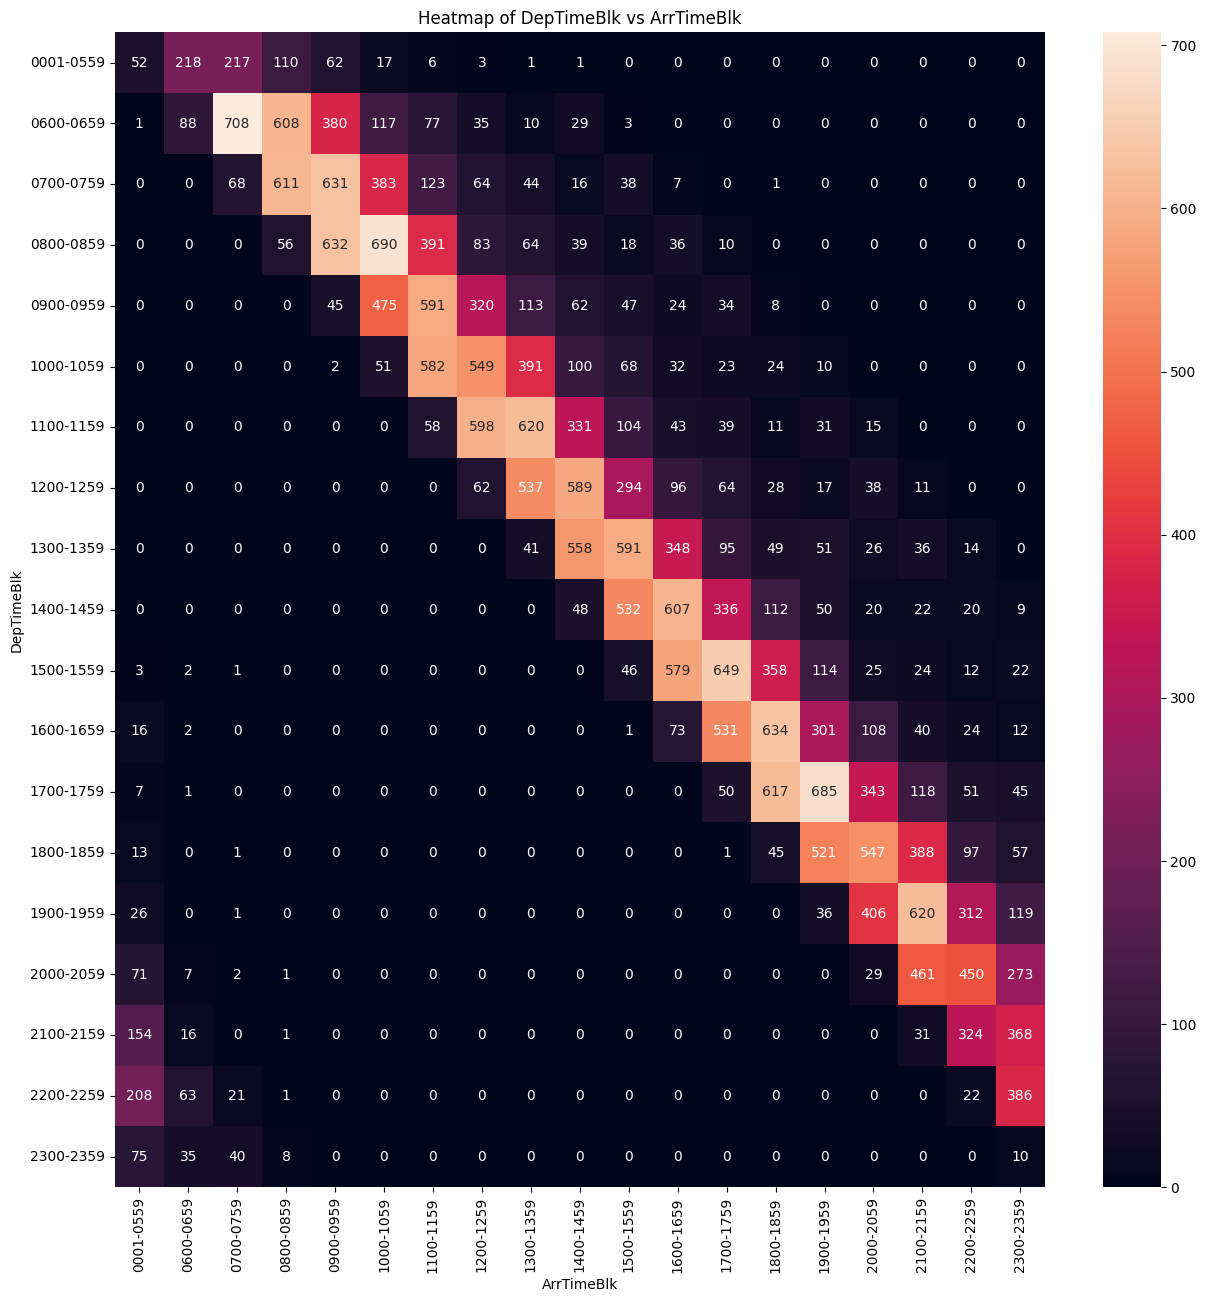

In [27]:
contingency_table = pandas.crosstab(flights["DepTimeBlk"], flights["ArrTimeBlk"])

sns.heatmap(contingency_table, annot=True, fmt="d")

plt.title('Heatmap of DepTimeBlk vs ArrTimeBlk')
plt.xlabel('ArrTimeBlk')
plt.ylabel('DepTimeBlk')
plt.gcf().set_size_inches(15, 15)
plt.show()

- The heatmap above shows that the departure time block and expected arrival time block are highly correlated linearly, probably due to the contraint that the number of flights are domestic within US and its territories, meaning long haul flights are limited and more shorter flights are more common
    - Therefore probably good to only use one of these attributes to train the model

<h2>Explore the effect of Airline on Disruption</h2>

In [28]:
print(f'Unique operating airlines: {flights["Operating_Airline"].nunique()}')


Unique operating airlines: 28


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'WN'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'OO'),
  Text(3, 0, 'UA'),
  Text(4, 0, 'DL'),
  Text(5, 0, 'B6'),
  Text(6, 0, 'YX'),
  Text(7, 0, 'MQ'),
  Text(8, 0, 'OH'),
  Text(9, 0, 'NK'),
  Text(10, 0, 'F9'),
  Text(11, 0, 'AS'),
  Text(12, 0, 'YV'),
  Text(13, 0, '9E'),
  Text(14, 0, 'G4'),
  Text(15, 0, 'ZW'),
  Text(16, 0, 'EV'),
  Text(17, 0, 'QX'),
  Text(18, 0, 'PT'),
  Text(19, 0, 'C5')])

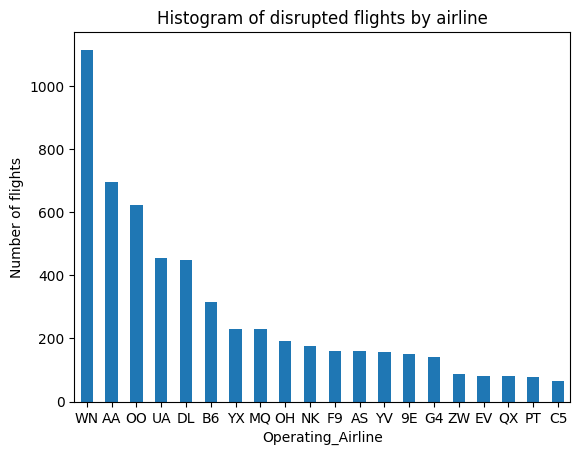

In [29]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights by airline")
flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts().head(20).plot(kind="bar")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'KS'),
  Text(1, 0, 'VX'),
  Text(2, 0, 'AX'),
  Text(3, 0, 'G4'),
  Text(4, 0, 'B6'),
  Text(5, 0, 'F9'),
  Text(6, 0, 'EM'),
  Text(7, 0, 'C5'),
  Text(8, 0, 'EV'),
  Text(9, 0, 'AA'),
  Text(10, 0, 'ZW'),
  Text(11, 0, 'YV'),
  Text(12, 0, 'NK'),
  Text(13, 0, 'WN'),
  Text(14, 0, 'MQ'),
  Text(15, 0, 'CP'),
  Text(16, 0, 'OH'),
  Text(17, 0, 'UA'),
  Text(18, 0, 'PT'),
  Text(19, 0, 'OO')])

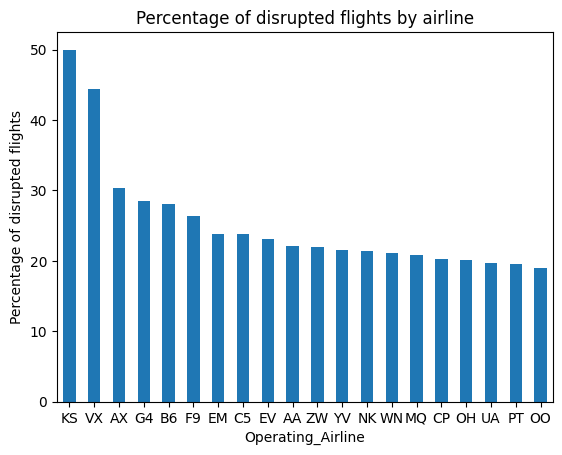

In [30]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airline")
(flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts() 
    / flights["Operating_Airline"].value_counts() * 100).sort_values(ascending=False).head(20).plot(kind="bar")
plt.xticks(rotation=0)

In [31]:
flights[flights["Operating_Airline"] == "KS"]

,Unnamed: 0,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
4460,4461,2018-01-22,Peninsula Airways Inc.,DUT,ANC,1810,150,792,2018,1,1,22,1,AS,AS_CODESHARE,19930,AS,3297,KS,20225,KS,N680PA,3297,11445,1144505,31445,"Unalaska, AK",AK,2,Alaska,1,10299,1029906,30299,"Anchorage, AK",AK,2,Alaska,1,1800-1859,2040,2000-2059,4,True
12467,12468,2019-06-11,Peninsula Airways Inc.,DUT,ANC,1755,150,792,2019,2,6,11,2,AS,AS_CODESHARE,19930,AS,3297,KS,20225,KS,N680PA,3297,11445,1144505,31445,"Unalaska, AK",AK,2,Alaska,1,10299,1029906,30299,"Anchorage, AK",AK,2,Alaska,1,1700-1759,2025,2000-2059,4,False


In [32]:
flights[flights["Operating_Airline"] == "VX"]

,Unnamed: 0,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
1319,1320,2018-02-08,Virgin America,DCA,DAL,705,215,1184,2018,1,2,8,4,VX,VX,21171,VX,1731,VX,21171,VX,N524VA,1731,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,11259,1125903,30194,"Dallas, TX",TX,48,Texas,74,0700-0759,940,0900-0959,5,False
1762,1763,2018-01-04,Virgin America,SFO,PHL,2246,314,2521,2018,1,1,4,4,VX,VX,21171,VX,1138,VX,21171,VX,N838VA,1138,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,2200-2259,700,0700-0759,11,False
2019,2020,2018-03-21,Virgin America,SFO,SEA,1355,127,679,2018,1,3,21,3,VX,VX,21171,VX,1751,VX,21171,VX,N622VA,1751,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93,1300-1359,1602,1600-1659,3,True
2568,2569,2018-02-06,Virgin America,SFO,KOA,1130,345,2367,2018,1,2,6,2,VX,VX,21171,VX,1041,VX,21171,VX,N284VA,1041,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,12758,1275804,32758,"Kona, HI",HI,15,Hawaii,2,1100-1159,1515,1500-1559,10,True
2865,2866,2018-03-01,Virgin America,SFO,DEN,1225,148,967,2018,1,3,1,4,VX,VX,21171,VX,1868,VX,21171,VX,N835VA,1868,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,1200-1259,1553,1500-1559,4,True
4190,4191,2018-01-02,Virgin America,SAN,SFO,655,98,447,2018,1,1,2,2,VX,VX,21171,VX,1951,VX,21171,VX,N364VA,1951,14679,1467903,33570,"San Diego, CA",CA,6,California,91,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,0600-0659,833,0800-0859,2,False
4997,4998,2018-03-31,Virgin America,LAX,PHL,2110,306,2402,2018,1,3,31,6,VX,VX,21171,VX,1128,VX,21171,VX,N851VA,1128,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,2100-2159,516,0001-0559,10,False
5032,5033,2018-02-07,Virgin America,SFO,JFK,1530,323,2586,2018,1,2,7,3,VX,VX,21171,VX,1026,VX,21171,VX,N845VA,1026,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,12478,1247805,31703,"New York, NY",NY,36,New York,22,1500-1559,2353,2300-2359,11,True
5133,5134,2018-03-17,Virgin America,SFO,IND,740,272,1943,2018,1,3,17,6,VX,VX,21171,VX,1254,VX,21171,VX,N521VA,1254,14771,1477104,32457,"San Francisco, CA",CA,6,California,91,12339,1233904,32337,"Indianapolis, IN",IN,18,Indiana,42,0700-0759,1512,1500-1559,8,False


- Despite operating airlines like Peninsula Airways Inc. having a high percentage of distrubted flights, there are so few entries in the dataset that it may not be representitive of predictions
    1. It may therefore more useful to look at the top airlines with disrupted flights that have significant numbers of entries in the dataset
    2. On the other hand, it may be good for predicting future flights as if the model has only seen an airline a few times, it may be good to hypothesize that there is a higher chance that this flight would get cancelled

<h3>Exploring how the number of entries an airline has correlate with disruption</h3>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'B6'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'WN'),
  Text(3, 0, 'MQ'),
  Text(4, 0, 'UA'),
  Text(5, 0, 'OO'),
  Text(6, 0, 'YX'),
  Text(7, 0, '9E'),
  Text(8, 0, 'DL')])

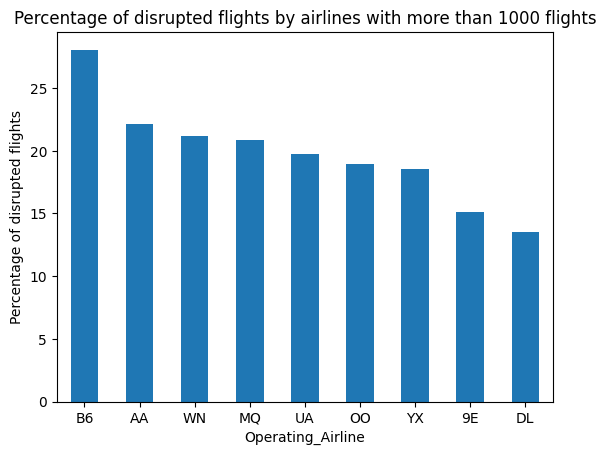

In [33]:
# Plot the histogram of top 5 airlines by percentage of disrupted flights (excluding airlines with less than 1000 flights)
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airlines with more than 1000 flights")
flights["Operating_Airline"].value_counts().loc[lambda x: x > 1000].index
(flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts() / flights["Operating_Airline"].value_counts() * 100).sort_values(ascending=False).loc[lambda x: flights["Operating_Airline"].value_counts() > 1000].head(20).plot(kind="bar")
plt.xticks(rotation=0)


In [34]:
flights[flights["Operating_Airline"] == "B6"]

,Unnamed: 0,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
3,4,2018-02-18,JetBlue Airways,JFK,LAX,1046,384,2475,2018,1,2,18,7,B6,B6,20409,B6,423,B6,20409,B6,N967JB,423,12478,1247805,31703,"New York, NY",NY,36,New York,22,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,1000-1059,1410,1400-1459,10,False
74,75,2018-08-29,JetBlue Airways,FLL,JAX,1832,77,319,2018,3,8,29,3,B6,B6,20409,B6,2718,B6,20409,B6,N339JB,2718,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,12451,1245102,31136,"Jacksonville, FL",FL,12,Florida,33,1800-1859,1949,1900-1959,2,False
92,93,2018-06-20,JetBlue Airways,PBI,JFK,1939,170,1028,2018,2,6,20,3,B6,B6,20409,B6,454,B6,20409,B6,N337JB,454,14027,1402702,34027,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,12478,1247805,31703,"New York, NY",NY,36,New York,22,1900-1959,2229,2200-2259,5,False
141,142,2018-02-24,JetBlue Airways,DTW,BOS,600,114,632,2018,1,2,24,6,B6,B6,20409,B6,1836,B6,20409,B6,N179JB,1836,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,0600-0659,754,0700-0759,3,False
190,191,2018-04-16,JetBlue Airways,DCA,MCO,1547,145,759,2018,2,4,16,1,B6,B6,20409,B6,2323,B6,20409,B6,N203JB,2323,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,1500-1559,1812,1800-1859,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29109,29110,2022-06-27,JetBlue Airways,LGA,FLL,600,179,1076,2022,2,6,27,1,B6,B6,20409,B6,171,B6,20409,B6,N629JB,171,12953,1295304,31703,"New York, NY",NY,36,New York,22,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,0600-0659,859,0800-0859,5,False
29117,29118,2022-06-21,JetBlue Airways,LGA,FLL,1115,194,1076,2022,2,6,21,2,B6,B6,20409,B6,271,B6,20409,B6,N529JB,271,12953,1295304,31703,"New York, NY",NY,36,New York,22,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,1100-1159,1429,1400-1459,5,True
29126,29127,2022-07-27,JetBlue Airways,FLL,PHX,1927,276,1972,2022,3,7,27,3,B6,B6,20409,B6,1157,B6,20409,B6,N595JB,1157,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,1900-1959,2103,2100-2159,8,False
29160,29161,2022-06-28,JetBlue Airways,JFK,MCO,1900,178,944,2022,2,6,28,2,B6,B6,20409,B6,1283,B6,20409,B6,N284JB,1283,12478,1247805,31703,"New York, NY",NY,36,New York,22,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,1900-1959,2158,2100-2159,4,False


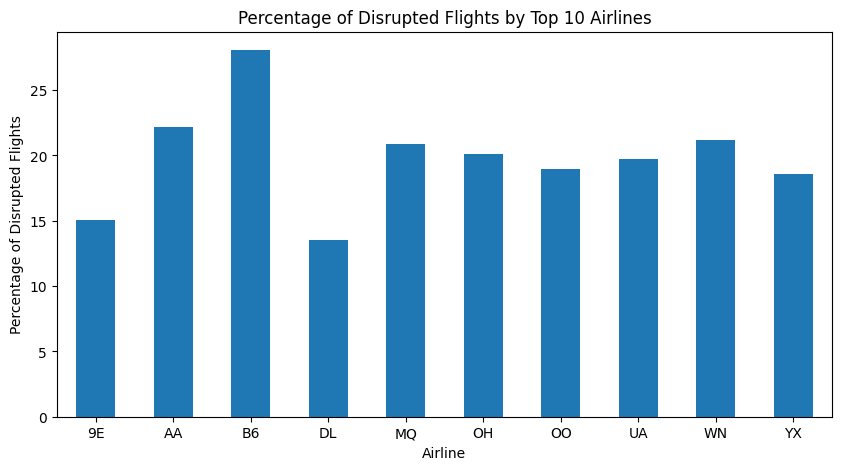

In [35]:
# Plot the percentage of disrupted flights by airline using the same axis as the previous plot
flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts().head(10)

top_10_airlines = flights["Operating_Airline"].value_counts().head(10).index.tolist()

top_10_flights = flights[flights["Operating_Airline"].isin(top_10_airlines)]
top_10_flights_disruption_percentage = (top_10_flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

plt.figure(figsize=(10, 5))
top_10_flights_disruption_percentage.plot(kind='bar')
plt.title('Percentage of Disrupted Flights by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Percentage of Disrupted Flights')
plt.xticks(rotation=0)
plt.show()


In [36]:
# Find the min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights
print("Min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights")

disruption_percentage = (flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights
min        0.000000
max       50.000000
mean      22.025208
median    21.018312
std        9.226714
Name: Disruption, dtype: float64

Q1: 18.74002731910161, Q3: 23.758136348064404


In [37]:
number_of_entries_per_airline = flights["Operating_Airline"].value_counts()

percentage_of_entries_per_airline = (flights["Operating_Airline"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_airline = (flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

data = {
    'Number_of_entries': number_of_entries_per_airline,
    'Percentage_of_entries': percentage_of_entries_per_airline,
    'Percent_of_disrupted_flights': disruption_percentage_per_airline
}
df = pandas.DataFrame(data)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df.rename(columns={'index': 'Operating_Airline'}, inplace=True)

print(df)

   Operating_Airline  Number_of_entries  Percentage_of_entries  \
0                 9E               1007               3.449693   
1                 9K                  2               0.006851   
2                 AA               3138              10.749889   
3                 AS                916               3.137953   
4                 AX                148               0.507006   
5                 B6               1126               3.857353   
6                 C5                278               0.952348   
7                 CP                183               0.626906   
8                 DL               3317              11.363091   
9                 EM                 21               0.071940   
10                EV                354               1.212703   
11                F9                612               2.096537   
12                G4                499               1.709431   
13                G7                266               0.911240   
14        

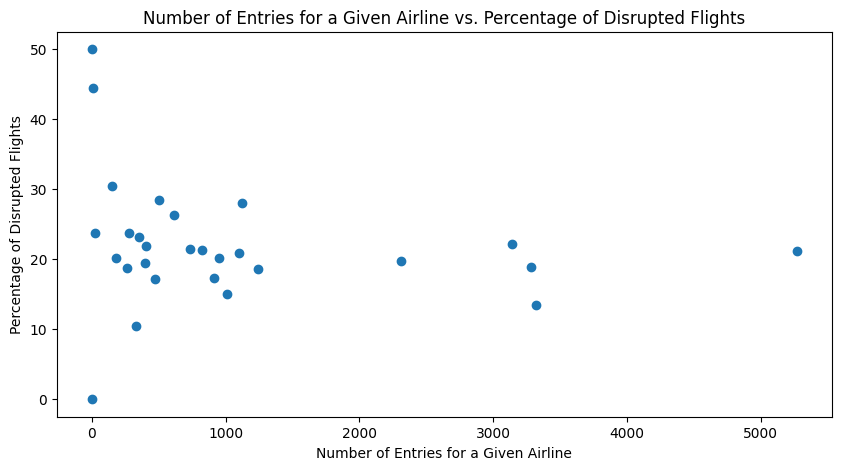

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Number_of_entries"], df["Percent_of_disrupted_flights"])
plt.title('Number of Entries for a Given Airline vs. Percentage of Disrupted Flights')
plt.xlabel('Number of Entries for a Given Airline')
plt.ylabel('Percentage of Disrupted Flights')
plt.show()

- On average, you can expect to have a disrupted flight around 20% of the time
    - If an airline has few entries in the dataset, it has a higher variation in terms of the chance of disruption
        - These airlines with few entries also experience distruptions of 25%+, which is not common for airlines with more entries
            - This transformation to represent a given airline as some form of number proportional to its entry may therefore be useful (any unseen entries predict can be automatically set to 0)

<h2>Explore the effect of distance on Disruption</h2>

In [39]:
print(f'Maximum distance: {flights["Distance"].max()}')
print(f'Minimum distance: {flights["Distance"].min()}')
print(f'Average distance: {flights["Distance"].mean()}')
print(f'Standard deviation: {flights["Distance"].std()}')

Maximum distance: 4983
Minimum distance: 31
Average distance: 774.2310301120208
Standard deviation: 573.2868164303726


<Axes: title={'center': 'Boxplot of distance'}, ylabel='Distance'>

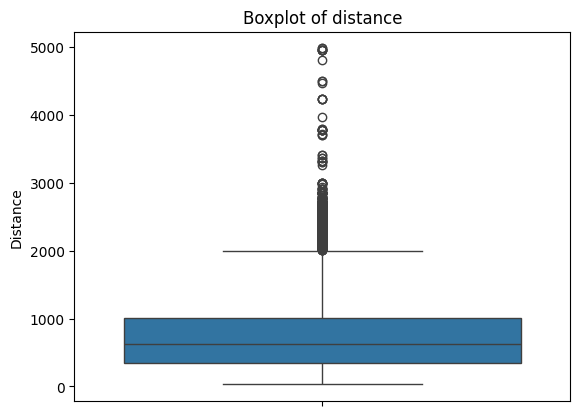

In [40]:
plt.ylabel("Distance")
plt.title("Boxplot of distance")
sns.boxplot(data=flights, y="Distance")

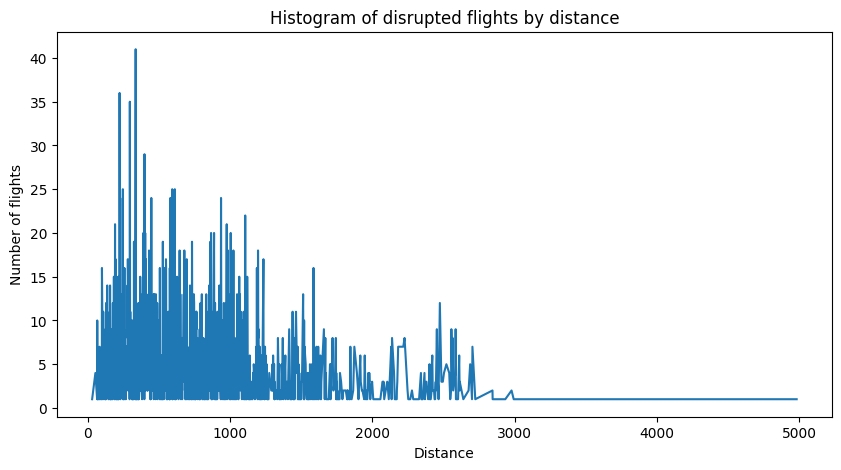

In [41]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights by distance")
flights[flights["Disruption"] == 1]["Distance"].value_counts().sort_index().plot()
plt.gcf().set_size_inches(10, 5)

In [42]:
print(f'Number of flights with distance greater than 3000: {len(flights[flights["Distance"] > 3000])}')
print(f'Number of flights with distance greater than 3000: {len(flights[flights["Distance"] > 3500])}')

Number of flights with distance greater than 3000: 37
Number of flights with distance greater than 3000: 27


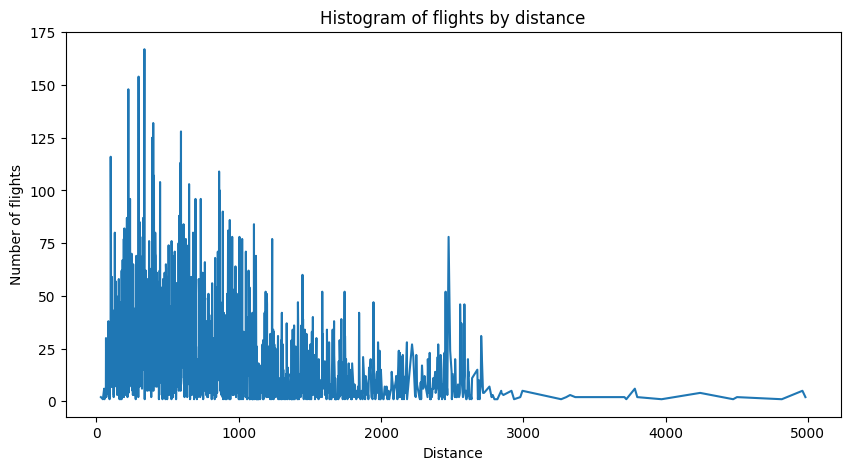

In [43]:
plt.ylabel("Number of flights")
plt.title("Histogram of flights by distance")
flights["Distance"].value_counts().sort_index().plot()
plt.gcf().set_size_inches(10, 5)

- Non linear M shaped pattern
- Outliers of long distance flights present

<h2>Explore the effect of origin & destination airport on Disruption</h2>

Given that I can only choose up to 10 features, I decided to choose both origin and destination airport on disruption as my 8th and 9th attribute as opposed to origin and destination state. This is because similar to month attribute, exploring the affect of origin state may not capture the full picture in comparison to the airport itself. The trade-off is that there might be a more widespread patterns that I may be missing out

In [44]:
print(f'Number of airports: {len(flights["OriginAirportID"].unique())}')

Number of airports: 369


In [45]:
top_10_origin_airports = flights["OriginAirportID"].value_counts().head(10)

print(f'Top 10 origin airports: {sorted(flights[flights["OriginAirportID"].isin(top_10_origin_airports.index)]["Origin"].unique())}')

top_10_dest_airports = flights["DestAirportID"].value_counts().head(10)

print(f'Top 10 destination airports: {sorted(flights[flights["DestAirportID"].isin(top_10_dest_airports.index)]["Dest"].unique())}')

# find intersection of top 10 origin and destination airports
intersection = top_10_origin_airports.index.intersection(top_10_dest_airports.index)

print(f'Top 10 origin and destination airports intersection: {sorted(flights[flights["OriginAirportID"].isin(intersection)]["Origin"].unique())}')

Top 10 origin airports: ['ATL', 'CLT', 'DEN', 'DFW', 'LAS', 'LAX', 'ORD', 'PHX', 'SEA', 'SFO']
Top 10 destination airports: ['ATL', 'CLT', 'DEN', 'DFW', 'DTW', 'IAH', 'LAX', 'ORD', 'PHX', 'SEA']
Top 10 origin and destination airports intersection: ['ATL', 'CLT', 'DEN', 'DFW', 'LAX', 'ORD', 'PHX', 'SEA']


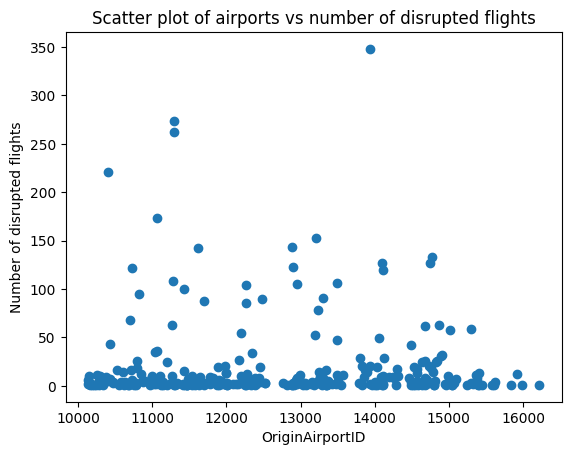

In [46]:
# Filter flights for disrupted flights
disrupted_flights = flights[flights["Disruption"] == 1]

# Count the number of disrupted flights for each airport
disrupted_flights_per_airport = disrupted_flights["OriginAirportID"].value_counts()

# Create scatter plot
plt.scatter(disrupted_flights_per_airport.index, disrupted_flights_per_airport.values)
plt.xlabel("OriginAirportID")
plt.ylabel("Number of disrupted flights")
plt.title("Scatter plot of airports vs number of disrupted flights")
plt.show()

Did not expect any trend given that there is no inhert order to the airport ID

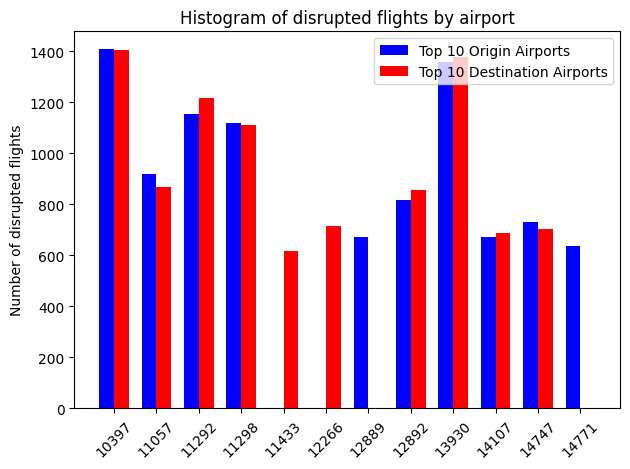

In [47]:
df = pandas.DataFrame({'Origin': top_10_origin_airports, 'Destination': top_10_dest_airports})

df = df.fillna(0)

top_airpots = top_10_origin_airports + top_10_dest_airports

x = np.arange(len(top_airpots))

bar_width = 0.35

# Plot the histogram for origin airports
plt.bar(x - bar_width/2, df['Origin'], bar_width, color='b', label='Top 10 Origin Airports')

# Plot the histogram for destination airports
plt.bar(x + bar_width/2, df['Destination'], bar_width, color='r', label='Top 10 Destination Airports')

# Set labels and title
plt.ylabel("Number of disrupted flights")
plt.title("Histogram of disrupted flights by airport")
plt.xticks(x, df.index, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Percentage of disrupted flights')

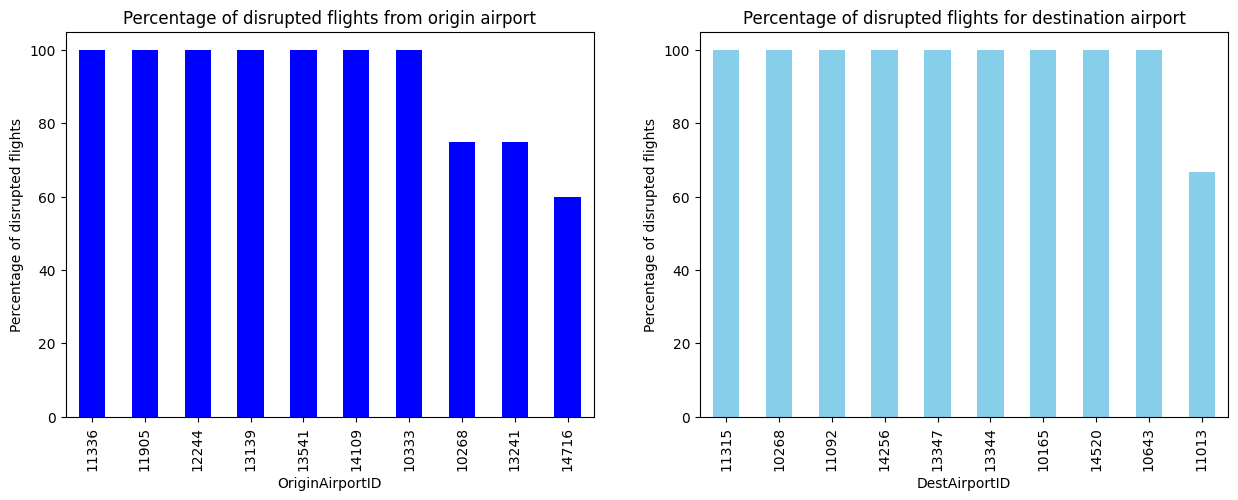

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

(flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / 
    flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).plot(kind="bar", ax=axs[0],color ='b')
axs[0].set_title('Percentage of disrupted flights from origin airport')
axs[0].set_ylabel('Percentage of disrupted flights')

(flights[flights["Disruption"] == 1]["DestAirportID"].value_counts() / 
    flights["DestAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).plot(kind="bar", ax=axs[1],color ='skyblue')
axs[1].set_title('Percentage of disrupted flights for destination airport')
axs[1].set_ylabel('Percentage of disrupted flights')

Intersection of airports with the most disrupted flights and airports with the highest percentage of disrupted flights

In [49]:
top_10_disrupted_airports = set(disrupted_flights["OriginAirportID"].value_counts().head(10).index)
top_10_disrupted_airports_percentage = set((flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index)
top_10_disrupted_airports.intersection(top_10_disrupted_airports_percentage)

set()

In [50]:
for airport in (flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index:
    print(f'Number of entries for origin airport {airport}: {len(flights[flights["OriginAirportID"] == airport])}')

for airport in (flights[flights["Disruption"] == 1]["DestAirportID"].value_counts() / flights["DestAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index:
    print(f'Number of entries for destination airport {airport}: {len(flights[flights["DestAirportID"] == airport])}')

Number of entries for origin airport 11336: 2
Number of entries for origin airport 11905: 1
Number of entries for origin airport 12244: 1
Number of entries for origin airport 13139: 2
Number of entries for origin airport 13541: 1
Number of entries for origin airport 14109: 1
Number of entries for origin airport 10333: 1
Number of entries for origin airport 10268: 4
Number of entries for origin airport 13241: 4
Number of entries for origin airport 14716: 5
Number of entries for destination airport 11315: 1
Number of entries for destination airport 10268: 1
Number of entries for destination airport 11092: 1
Number of entries for destination airport 14256: 1
Number of entries for destination airport 13347: 3
Number of entries for destination airport 13344: 1
Number of entries for destination airport 10165: 1
Number of entries for destination airport 14520: 1
Number of entries for destination airport 10643: 1
Number of entries for destination airport 11013: 3


<Axes: title={'center': 'Percentage of disrupted flights by airports with more than 1000 flights'}, xlabel='OriginAirportID', ylabel='Percentage of disrupted flights'>

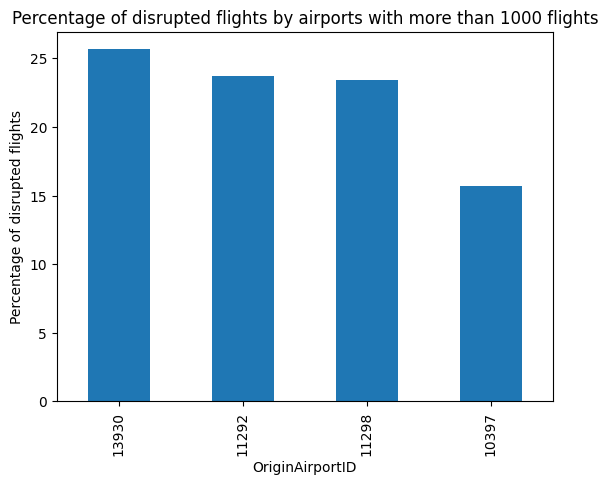

In [51]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airports with more than 1000 flights")
(flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).loc[lambda x: flights["OriginAirportID"].value_counts() > 1000].head(10).plot(kind="bar")


Print the number of entries for the airports with the highest percentage of disrupted flights for airports with more than 1000 entries:

In [52]:
airport_ID_value_counts_disrupted = flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts()
airport_ID_value_counts = flights["OriginAirportID"].value_counts()
for airport in (airport_ID_value_counts_disrupted / airport_ID_value_counts * 100).loc[lambda x: airport_ID_value_counts > 1000].head(10).index:
    print(f'Number of entries for airport {airport}: {len(flights[flights["OriginAirportID"] == airport])}')

Number of entries for airport 10397: 1407
Number of entries for airport 11292: 1155
Number of entries for airport 11298: 1118
Number of entries for airport 13930: 1357


In [53]:

top_10_origin_airports_set = set(top_10_origin_airports.index)
top_10_airports_percentage = set((flights[flights["Disruption"] == 1]["OriginAirportID"]
                                  .value_counts() / flights["OriginAirportID"].value_counts() * 100)
                                  .loc[lambda x: flights["OriginAirportID"].value_counts() > 1000]
                                  .head(10).index)
print("Intersection of top 10 airports and top 10 airports by percentage of disrupted flights with more than 1000 entries: ",
       top_10_origin_airports_set.intersection(top_10_airports_percentage))

Intersection of top 10 airports and top 10 airports by percentage of disrupted flights with more than 1000 entries:  {11298, 11292, 10397, 13930}


In [54]:
print("Min, max, mean, median and standard deviation of the each origin airport's distrupted flights")

disruption_percentage = (flights.groupby("OriginAirportID")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each destination airport's distrupted flights
min         0.000000
max       100.000000
mean       19.415351
median     18.032787
std        17.235673
Name: Disruption, dtype: float64

Q1: 10.0, Q3: 25.0


In [55]:
print("Min, max, mean, median and standard deviation of the each destination airport's distrupted flights")

disruption_percentage = (flights.groupby("DestAirportID")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each destination airport's distrupted flights
min         0.000000
max       100.000000
mean       20.370191
median     19.601576
std        18.391043
Name: Disruption, dtype: float64

Q1: 9.523809523809524, Q3: 26.888736263736263


In [56]:
number_of_entries_per_airport = flights["OriginAirportID"].value_counts()

percentage_of_entries_per_airport = (flights["OriginAirportID"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_airport = (flights.groupby("OriginAirportID")["Disruption"].mean() * 100)

data = {
    'Number_of_entries': number_of_entries_per_airport,
    'Percentage_of_entries': percentage_of_entries_per_airport,
    'Percent_of_disrupted_flights': disruption_percentage_per_airport
}
df = pandas.DataFrame(data)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df.rename(columns={'index': 'OriginAirportID'}, inplace=True)

print(df)

     OriginAirportID  Number_of_entries  Percentage_of_entries  \
0              10135                 20               0.068514   
1              10136                 11               0.037683   
2              10140                 91               0.311740   
3              10141                  3               0.010277   
4              10146                  3               0.010277   
..               ...                ...                    ...   
364            15919                 50               0.171286   
365            15991                  7               0.023980   
366            16101                  6               0.020554   
367            16218                 13               0.044534   
368            16869                  3               0.010277   

     Percent_of_disrupted_flights  
0                       30.000000  
1                       18.181818  
2                       10.989011  
3                        0.000000  
4                        0.

In [57]:
number_of_entries_per_dest_airport = flights["DestAirportID"].value_counts()

percentage_of_entries_per_dest_airport = (flights["DestAirportID"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_dest_airport = (flights.groupby("DestAirportID")["Disruption"].mean() * 100)

data2 = {
    'Number_of_entries': number_of_entries_per_dest_airport,
    'Percentage_of_entries': percentage_of_entries_per_dest_airport,
    'Percent_of_disrupted_flights': disruption_percentage_per_dest_airport
}
df2 = pandas.DataFrame(data2)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df2.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df2.rename(columns={'index': 'DestAirportID'}, inplace=True)

print(df2)

     DestAirportID  Number_of_entries  Percentage_of_entries  \
0            10135                 23               0.078791   
1            10136                  6               0.020554   
2            10140                 94               0.322017   
3            10141                  2               0.006851   
4            10146                  3               0.010277   
..             ...                ...                    ...   
353          15919                 55               0.188414   
354          15991                  3               0.010277   
355          16101                  7               0.023980   
356          16218                  4               0.013703   
357          16869                  4               0.013703   

     Percent_of_disrupted_flights  
0                       21.739130  
1                       33.333333  
2                       20.212766  
3                        0.000000  
4                       33.333333  
..             

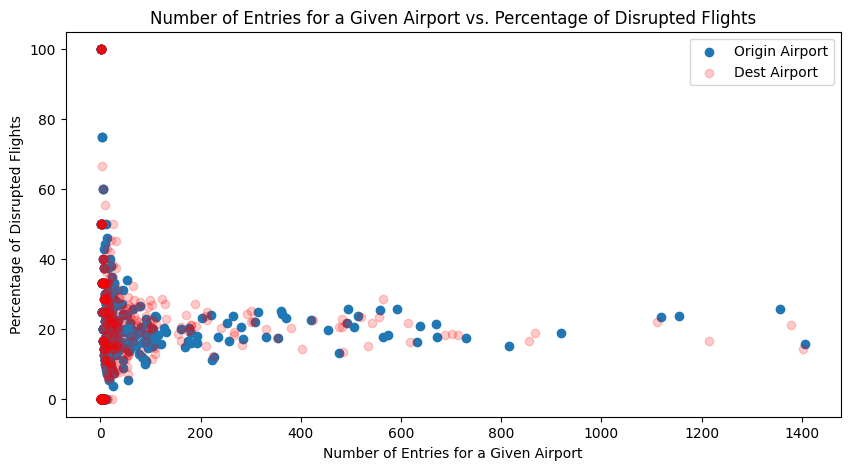

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Number_of_entries"], df["Percent_of_disrupted_flights"], label='Origin Airport')
plt.scatter(df2["Number_of_entries"], df2["Percent_of_disrupted_flights"], color='red', label='Dest Airport', alpha=0.2)
plt.title('Number of Entries for a Given Airport vs. Percentage of Disrupted Flights')
plt.xlabel('Number of Entries for a Given Airport')
plt.ylabel('Percentage of Disrupted Flights')
plt.legend()
plt.show()

<h2>Origin State</h2>

In [59]:
flights["OriginState"].unique()

array(['UT', 'IL', 'FL', 'NY', 'AR', 'WA', 'VA', 'NV', 'CA', 'OH', 'CO',
       'NJ', 'AZ', 'GA', 'TX', 'MD', 'MO', 'MN', 'KY', 'NC', 'LA', 'HI',
       'PA', 'TN', 'CT', 'MA', 'OR', 'OK', 'ID', 'MT', 'RI', 'MI', 'SC',
       'NH', 'PR', 'SD', 'IN', 'AL', 'AK', 'ND', 'WI', 'NM', 'VI', 'VT',
       'IA', 'KS', 'MS', 'NE', 'ME', 'WV', 'TT', 'WY'], dtype=object)

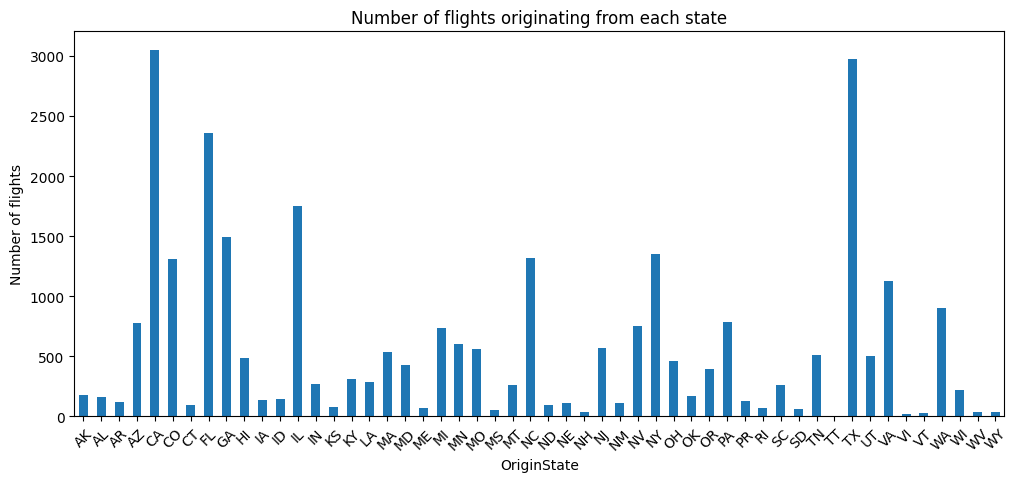

In [85]:
plt.ylabel("Number of flights")
plt.title("Number of flights originating from each state")
flights["OriginState"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

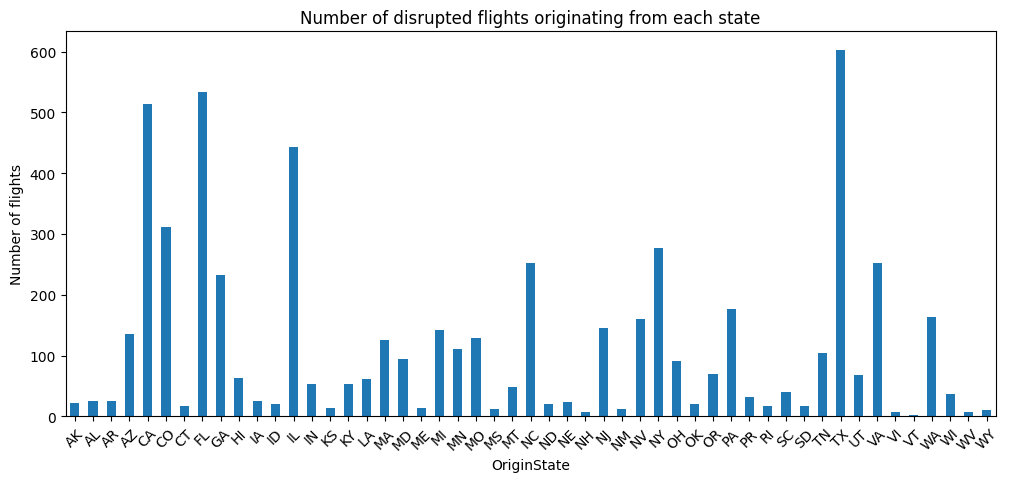

In [86]:
# plot the number of disrupted flights originating from each state
plt.ylabel("Number of flights")
plt.title("Number of disrupted flights originating from each state")
flights[flights["Disruption"] == 1]["OriginState"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

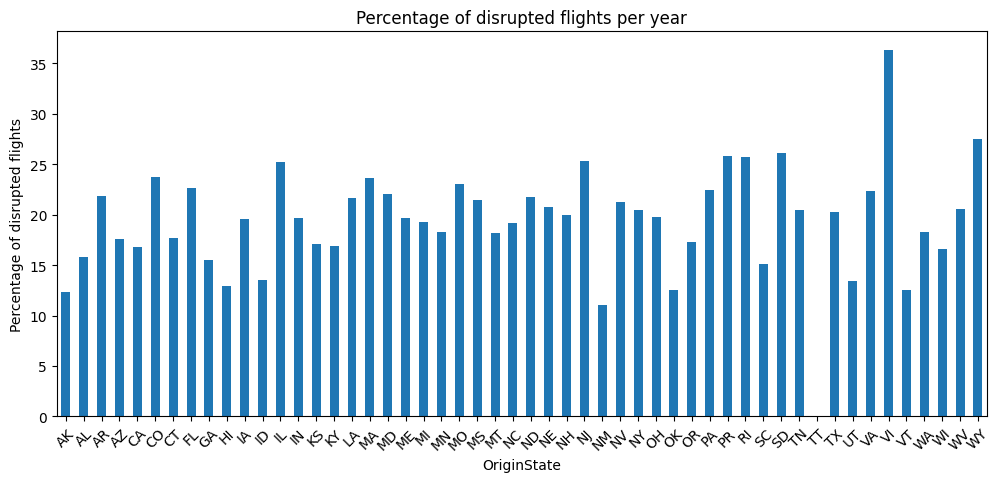

In [87]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per year")
(flights[flights["Disruption"] == 1]["OriginState"].value_counts().sort_index() / 
    flights["OriginState"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

In [63]:
# Data from https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

state_data = pandas.read_csv("NST-EST2023-ALLDATA.csv")

pandas.set_option('display.max_columns', None)

# POPESTIMATE2021 is chosen as it is the latest year for the dataset with full data
state_data = state_data[["NAME", "REGION", "POPESTIMATE2021"]]


def lookup_state_abbr(name):
    state = us.states.lookup(name)
    if state is not None:
        return state.abbr
    else:
        return name

state_data["NAME"] = state_data["NAME"].apply(lookup_state_abbr).str.strip()


display(state_data)

,NAME,REGION,DIVISION,POPESTIMATE2021
0,United States,0,0,332048977
1,Northeast Region,1,0,57243423
2,New England,1,1,15106108
3,Middle Atlantic,1,2,42137315
4,Midwest Region,2,0,68850246
...,...,...,...,...
61,WA,4,9,7741433
62,WV,3,5,1785249
63,WI,2,3,5879978
64,WY,4,8,579548


In [64]:
duplicate_indices = state_data.index[state_data.index.duplicated()]

flights = flights.merge(state_data, left_on='OriginState', right_on='NAME', how='left')
flights.drop(columns=['NAME'], inplace=True)



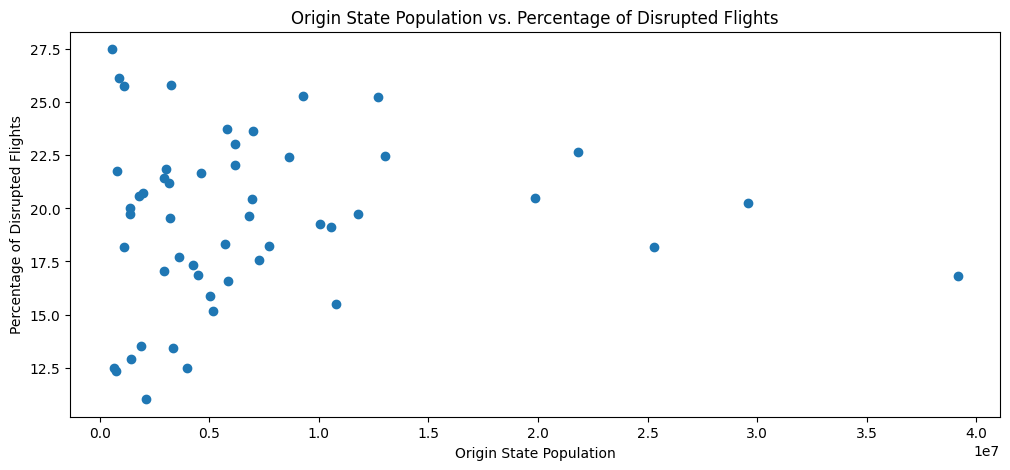

In [72]:
# Calculate the percentage of disrupted flights for each population bucket
disrupted_flights_by_population = flights.groupby("POPESTIMATE2021")["Disruption"].mean() * 100

# Plot the scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(disrupted_flights_by_population.index, disrupted_flights_by_population.values)
plt.title('Origin State Population vs. Percentage of Disrupted Flights')
plt.xlabel('Origin State Population')
plt.ylabel('Percentage of Disrupted Flights')
plt.show()

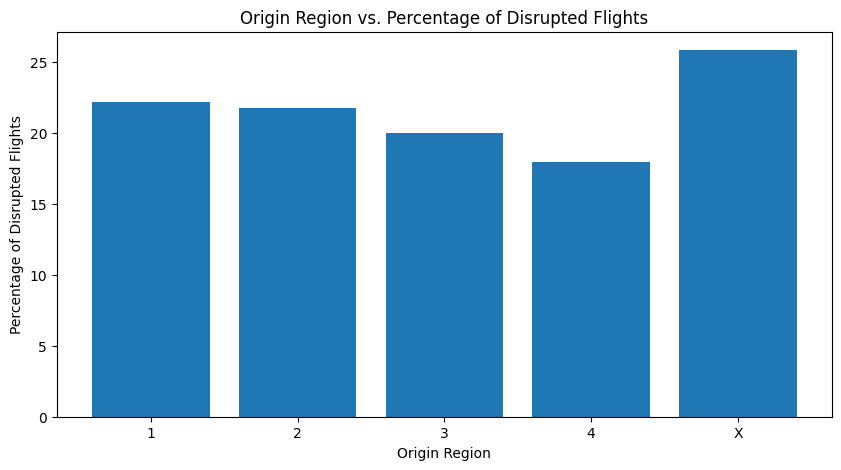

In [71]:
disrupted_flights_by_population = flights.groupby("REGION")["Disruption"].mean() * 100

# Plot the scatter plot
plt.figure(figsize=(10, 5))
plt.bar(disrupted_flights_by_population.index, disrupted_flights_by_population.values)
plt.title('Origin Region vs. Percentage of Disrupted Flights')
plt.xlabel('Origin Region')
plt.ylabel('Percentage of Disrupted Flights')
plt.show()

<h3>Check for Missing values</h3>

In [68]:
print(flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29323 entries, 0 to 29322
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               29323 non-null  int64  
 1   FlightDate                               29323 non-null  object 
 2   Airline                                  29323 non-null  object 
 3   Origin                                   29323 non-null  object 
 4   Dest                                     29323 non-null  object 
 5   CRSDepTime                               29323 non-null  int64  
 6   CRSElapsedTime                           29323 non-null  int64  
 7   Distance                                 29323 non-null  int64  
 8   Year                                     29323 non-null  int64  
 9   Quarter                                  29323 non-null  int64  
 10  Month                                    29323